<a href="https://colab.research.google.com/github/thegregbeyond/FreeFuse-AI-Calbright-Project/blob/main/Week_3_Deliverables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create Deliverables for Week 3

Mounting Google Drive...
Mounted at /content/drive
✅ Google Drive mounted.
Loaded 888 rows from final_annotations.csv
✅ Object frequency table saved to final_object_frequency_table.csv
✅ Co-occurrence matrix saved to final_co_occurrence_matrix.csv
✅ Heatmap saved to object_positioning_heatmap.png


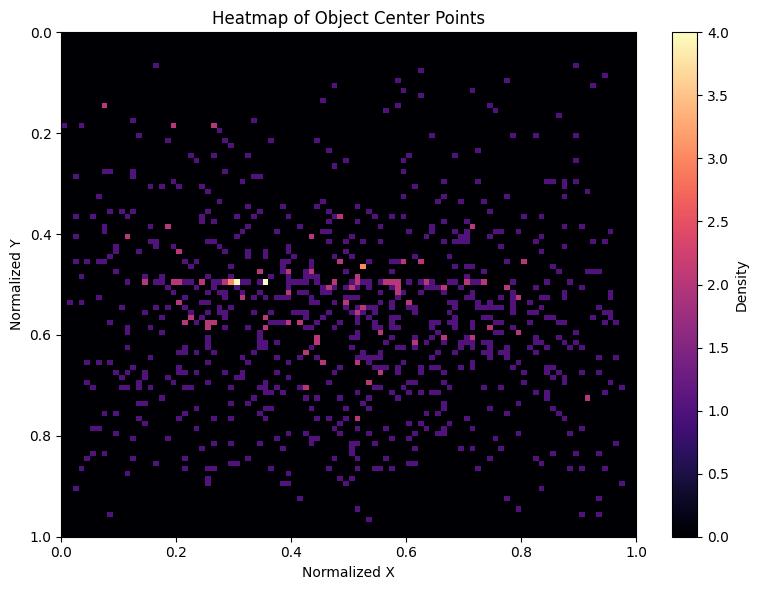

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from google.colab import drive

# === Configuration ===
DRIVE_MOUNT_POINT = Path('/content/drive')
PROJECT_ROOT      = DRIVE_MOUNT_POINT / 'MyDrive/FreeFuse_Project'
INPUT_CSV         = PROJECT_ROOT / 'final_annotations.csv'
OUTPUT_FREQ_CSV   = PROJECT_ROOT / 'final_object_frequency_table.csv'
OUTPUT_COOC_CSV   = PROJECT_ROOT / 'final_co_occurrence_matrix.csv'
OUTPUT_HEATMAP    = PROJECT_ROOT / 'object_positioning_heatmap.png'
# =====================

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount(str(DRIVE_MOUNT_POINT), force_remount=True)
print("Google Drive mounted.")

# Load annotations
if not INPUT_CSV.exists():
    raise FileNotFoundError(f"Annotation file not found: {INPUT_CSV}")
df = pd.read_csv(INPUT_CSV)
print(f"Loaded {len(df)} rows from {INPUT_CSV.name}")

# === Deliverable 1: Object Frequency Table ===
freq = df['object_name'].value_counts().rename_axis('object_name').reset_index(name='frequency')
freq.to_csv(OUTPUT_FREQ_CSV, index=False)
print(f"Object frequency table saved to {OUTPUT_FREQ_CSV.name}")

# === Deliverable 2: Co-occurrence Matrix ===
grouped = df.groupby('frame_id')['object_name'].apply(lambda x: set(x))
pair_counter = Counter()
for objs in grouped:
    for a, b in combinations(sorted(objs), 2):
        pair_counter[(a, b)] += 1

objects = sorted(df['object_name'].unique())
mat = pd.DataFrame(0, index=objects, columns=objects, dtype=int)
for (a, b), cnt in pair_counter.items():
    mat.at[a, b] = cnt
    mat.at[b, a] = cnt
# Diagonal = total frequency
diag = df['object_name'].value_counts()
for obj, cnt in diag.items():
    mat.at[obj, obj] = cnt

mat.to_csv(OUTPUT_COOC_CSV)
print(f"Co-occurrence matrix saved to {OUTPUT_COOC_CSV.name}")

# === Deliverable 3: Positional Heatmap ===
df['center_x'] = (df['x_min'] + df['x_max']) / 2
df['center_y'] = (df['y_min'] + df['y_max']) / 2
df['norm_x']  = df['center_x'] / df['image_width_px']
df['norm_y']  = df['center_y'] / df['image_height_px']

plt.figure(figsize=(8, 6))
hb = plt.hist2d(
    df['norm_x'], df['norm_y'],
    bins=100, range=[[0,1],[0,1]],
    cmap='magma'
)
plt.colorbar(hb[3], label='Density')
plt.xlabel('Normalized X')
plt.ylabel('Normalized Y')
plt.title('Heatmap of Object Center Points')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(OUTPUT_HEATMAP, dpi=300)
print(f"Heatmap saved to {OUTPUT_HEATMAP.name}")
plt.show()